# Template Matching
## Simplest form of object detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# big picture
full = cv2.imread('Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

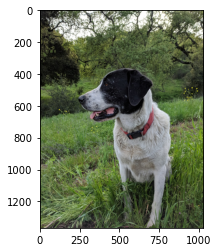

In [7]:
plt.imshow(full)

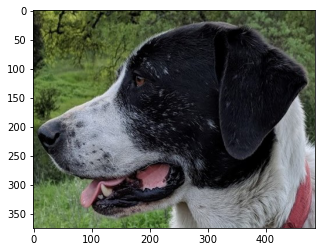

In [8]:
# small picture
face = cv2.imread('Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [9]:
# we will use the eval function
# eval evaluates if a string matches a function name and runs it for example
mystring = 'sum'
myfunc = eval('sum')
myfunc([1,2,3])

6

In [10]:
# this is useful because we are going to have a list of strings that we will need to evaluate for a function

In [11]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

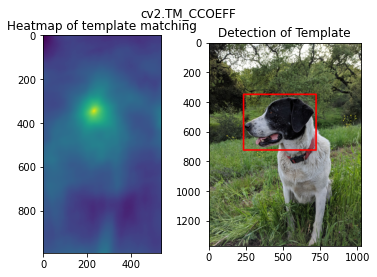

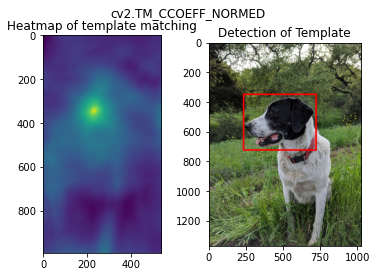

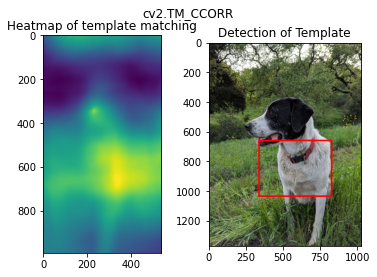

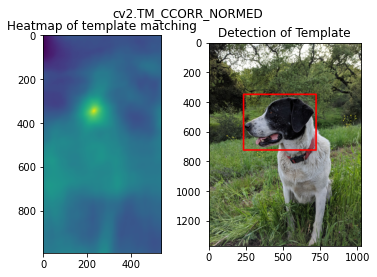

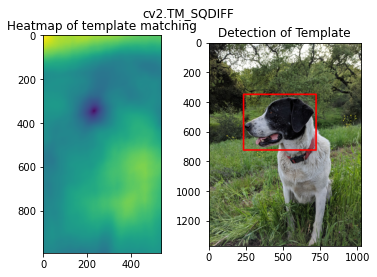

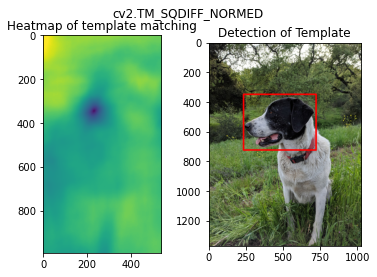

In [14]:
for m in methods:
    # create a copy of the image
    full_copy = full.copy()
    # we select the method that we will be using
    method = eval(m)
    # template matching
    res = cv2.matchTemplate(full_copy,face,method)
    
    # obtain values
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    # obtain values particularly formatted for these two methods
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else: 
        top_left = max_loc
    
    # drawing the rectangle and declaring its character
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    # drawing
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    # plt.show() so they do not overwrite themselves
    plt.show()
    print('\n\n')